# Regression Notebook: California Housing Dataset

# 1. Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# 2. Load the Dataset
housing = fetch_california_housing(as_frame=True)
df = housing.frame.copy()

# 2. Nettoyage des donnees :
- Gestion des valeurs manquantes (imputation ou suppression).
- Suppression des doublons.

In [ ]:
# check for missing values 
print("Missing values per column:\n", df.isnull().sum())
# delete rows with missing values
df.dropna(inplace=True)
#check for duplicates
print("Duplicates in the dataset: ", df.duplicated().sum())
# delete duplicates
df.drop_duplicates(inplace=True)

Missing values per column:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


# 3. Exploration des donnees :
- Analyse statistique (moyenne, mediane, ́ecart-type, etc.).
- Visualisation des donnees (histogrammes, boxplots, heatmaps de corr ́elation).

In [4]:
# Analyse statistique (moyenne, m ́ediane,  ́ecart-type, etc.)
print("Statistical analysis of the dataset:\n", df.describe())

Statistical analysis of the dataset:
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153

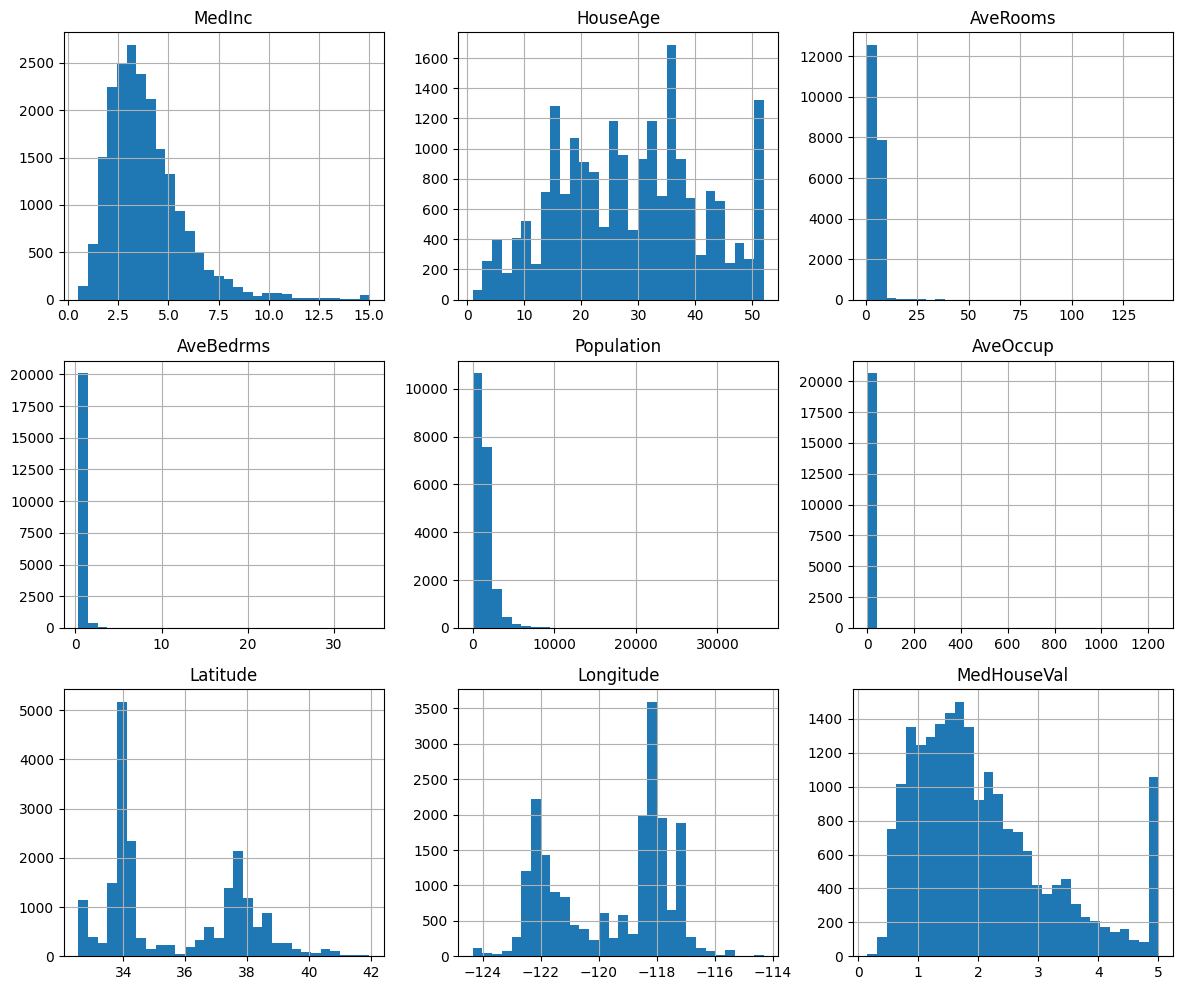

In [5]:
# Visualisation des donnees (histogrammes, boxplots, heatmaps de correlation).
# Histogrammes
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()

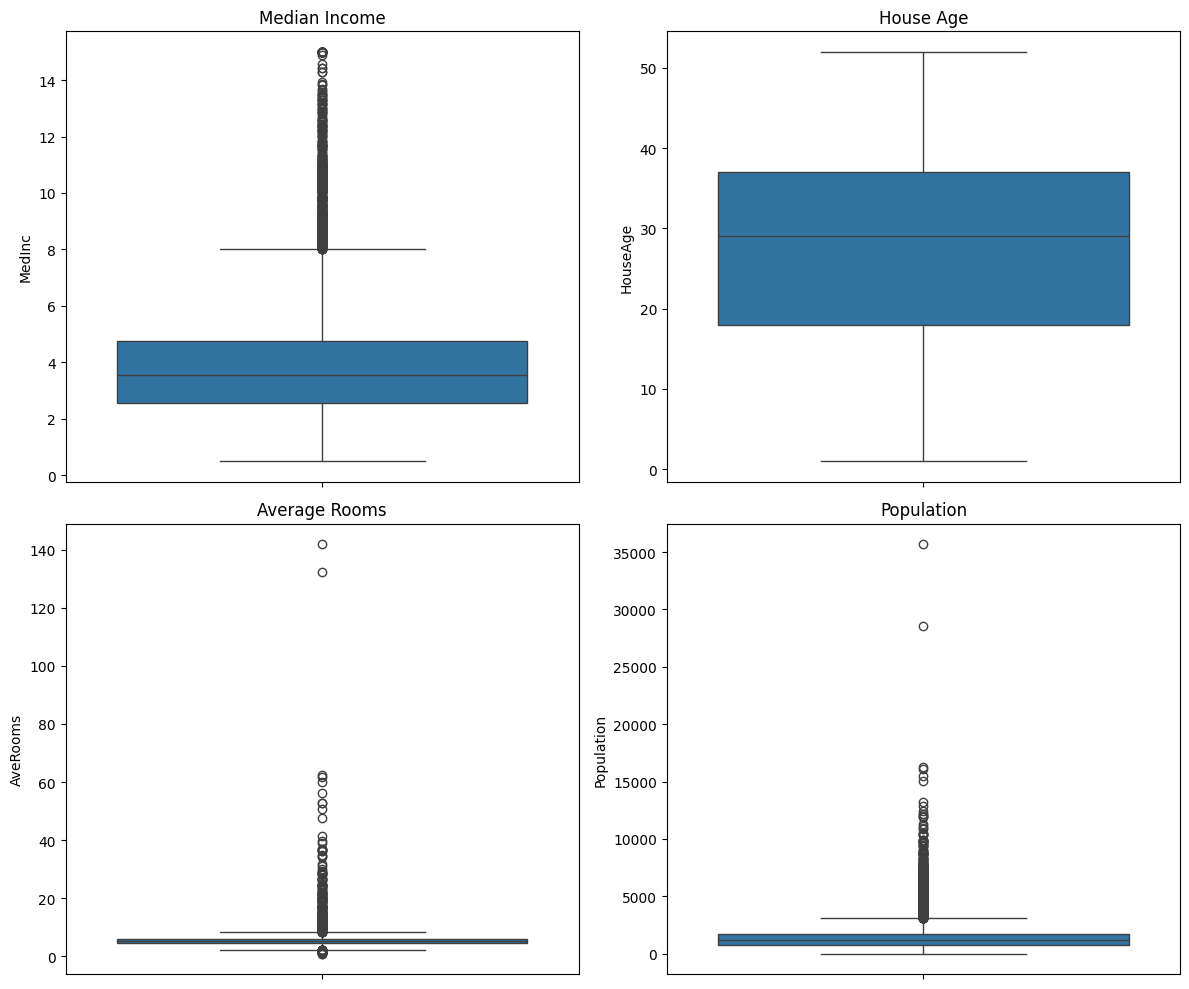

In [ ]:
# Boxplots of some features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.boxplot(y='MedInc', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Median Income')

sns.boxplot(y='HouseAge', data=df, ax=axes[0, 1])
axes[0, 1].set_title('House Age')


sns.boxplot(y='AveRooms', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Average Rooms')

sns.boxplot(y='Population', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Population')

plt.tight_layout()
plt.show()

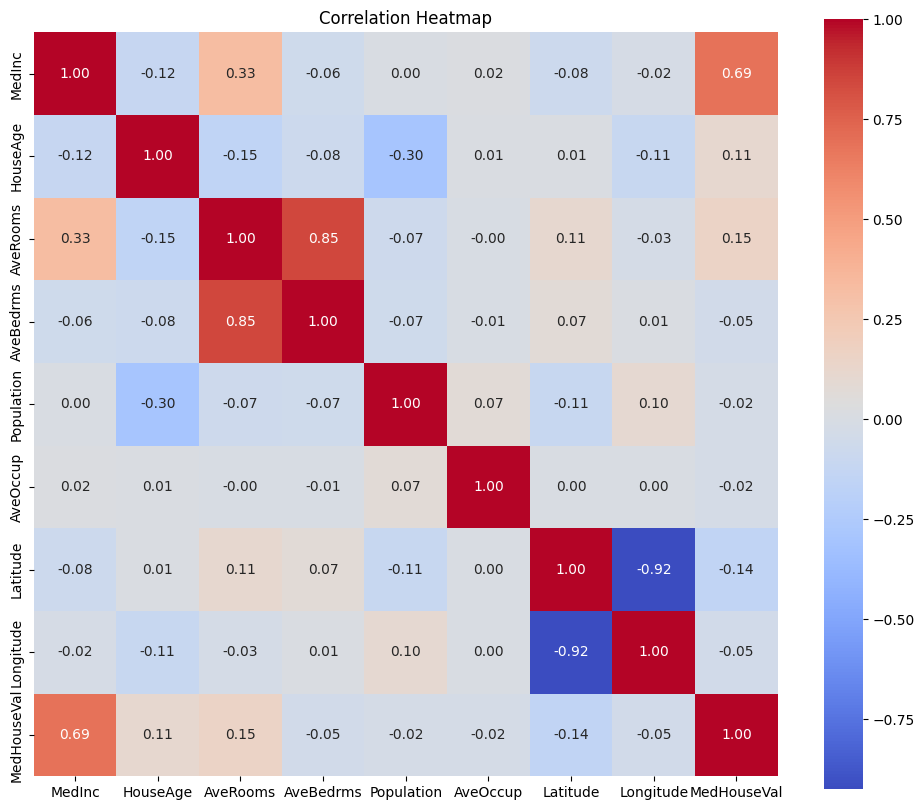

In [10]:
# Heatmap de correlation (seulement pour les colonnes numériques)
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()

# 4. Transformation des donnees :
- Encodage des variables cat ́egorielles (One-Hot Encoding, Label En-coding).
- Normalisation ou standardisation des donnees.

In [11]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# normalize the data
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])

# 5. Separation des donnees :
- Diviser les donnees en ensembles d’entrainement et de test (e.g., 80/20
ou 70/30).

In [12]:
# 3. Split the dataset into training and testing sets
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the dataset into training and testing sets and evaluation sets (percentages)
# 80% training, 10% evaluation, 10% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [4]:
# 4. Transformation des données
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# modelisation without sklearn
# Linear Regression
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            y_predicted = np.dot(X, self.weights) + self.bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias
    
# Decision Tree Regressor
class DecisionTreeRegressorScratch:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y)

    def _build_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        if n_samples == 0 or (self.max_depth is not None and depth >= self.max_depth):
            return np.mean(y)

        best_split = self._find_best_split(X, y)
        if best_split is None:
            return np.mean(y)

        left_indices = X[:, best_split['feature']] < best_split['threshold']
        right_indices = X[:, best_split['feature']] >= best_split['threshold']

        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)

        return {
            'feature': best_split['feature'],
            'threshold': best_split['threshold'],
            'left': left_tree,
            'right': right_tree
        }

    def _find_best_split(self, X, y):
        n_samples, n_features = X.shape
        best_mse = float('inf')
        best_split = None

        for feature in range(n_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] < threshold
                right_indices = X[:, feature] >= threshold

                if len(y[left_indices]) == 0 or len(y[right_indices]) == 0:
                    continue

                mse_left = mean_squared_error(y[left_indices], np.mean(y[left_indices]))
                mse_right = mean_squared_error(y[right_indices], np.mean(y[right_indices]))
                mse = (len(y[left_indices]) * mse_left + len(y[right_indices]) * mse_right) / n_samples

                if mse < best_mse:
                    best_mse = mse
                    best_split = {'feature': feature, 'threshold': threshold}

        return best_split

    def predict(self, X):
        return np.array([self._predict_sample(sample) for sample in X])

    def _predict_sample(self, sample):
        node = self.tree
        while isinstance(node, dict):
            if sample[node['feature']] < node['threshold']:
                node = node['left']
            else:
                node = node['right']
        return node

# Random Forest Regressor
class RandomForestRegressorScratch:
    def __init__(self, n_estimators=100, max_depth=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.n_estimators):
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth)
            bootstrap_indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[bootstrap_indices]
            y_bootstrap = y.iloc[bootstrap_indices]
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        return np.mean(predictions, axis=0)
    
# Gradient Boosting Regressor
class GradientBoostingRegressorScratch:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        y_pred = np.zeros(y.shape)
        for _ in range(self.n_estimators):
            residuals = y - y_pred
            tree = DecisionTreeRegressorScratch(max_depth=self.max_depth)
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        y_pred = np.zeros(X.shape[0])
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [ ]:
models = {
    'Linear Regression': LinearRegressionScratch(),
    'Decision Tree Regressor': DecisionTreeRegressorScratch(max_depth=5),
    'Random Forest Regressor': RandomForestRegressorScratch(n_estimators=100, max_depth=5),
    'Gradient Boosting Regressor': GradientBoostingRegressorScratch(n_estimators=100, learning_rate=0.1, max_depth=3)
}
# 5. Model Training and Evaluation
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        'MSE': mse,
        'MAE': mae,
        'R2': r2
    }

# Display results
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by='R2', ascending=False)
print("Model Evaluation Results:\n", results_df)
# 6. Hyperparameter Tuning using GridSearchCV

In [ ]:
# 5. Modélisation sklearn
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

results = {}


Linear Regression Evaluation:
MSE: 0.5558915986952444
RMSE: 0.7455813830127764
MAE: 0.5332001304956566
R2: 0.5757877060324508


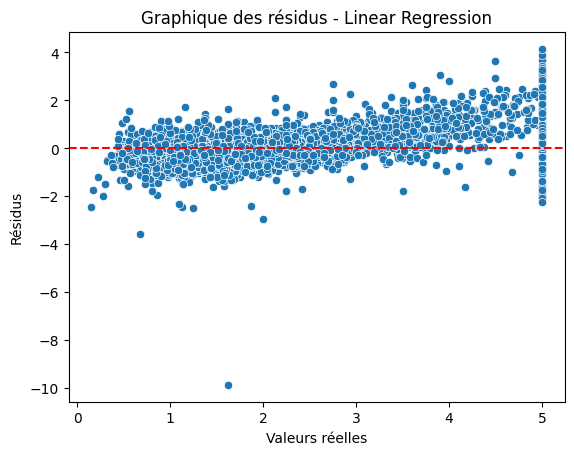


Decision Tree Evaluation:
MSE: 0.4928967168112645
RMSE: 0.7020660345090514
MAE: 0.45361789970930233
R2: 0.6238603939718638


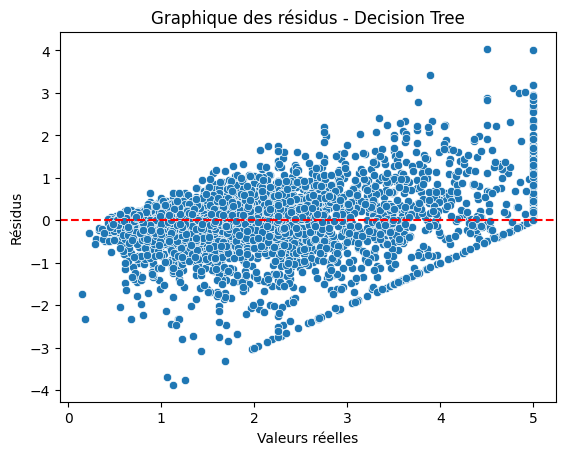


Random Forest Evaluation:
MSE: 0.25693390036206765
RMSE: 0.5068864767993595
MAE: 0.32997681140988383
R2: 0.8039284646027249


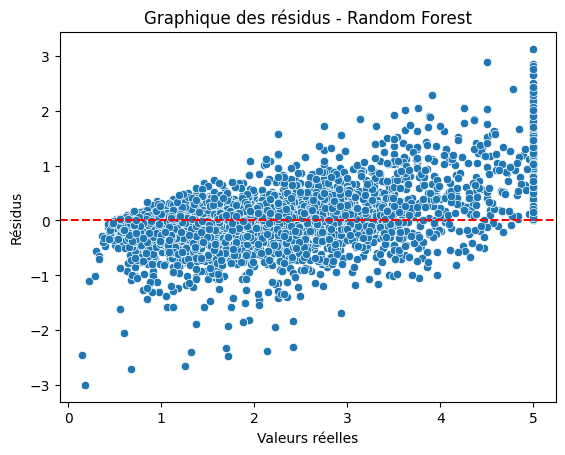


Gradient Boosting Evaluation:
MSE: 0.29399901242474274
RMSE: 0.5422167577867202
MAE: 0.3716504484843678
R2: 0.7756433164710084


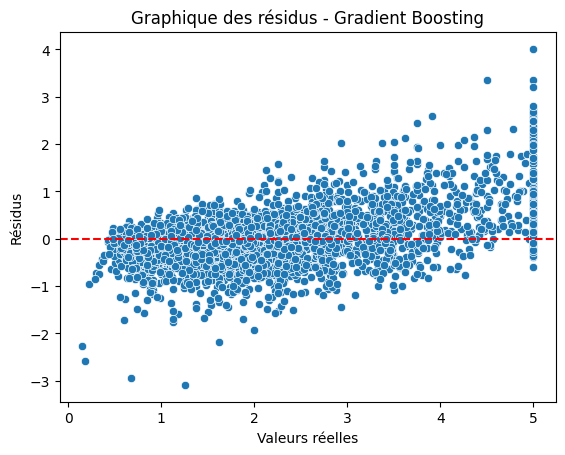

In [6]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = [mse, rmse, mae, r2]
    print(f"\n{name} Evaluation:")
    print("MSE:", mse)
    print("RMSE:", rmse)
    print("MAE:", mae)
    print("R2:", r2)

    # Visualisation des résidus
    residuals = y_test - y_pred
    sns.scatterplot(x=y_test, y=residuals)
    plt.axhline(0, linestyle='--', color='red')
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Résidus")
    plt.title(f"Graphique des résidus - {name}")
    plt.show()

In [7]:
# 6. Analyse des résultats
print("\nComparaison des performances:")
results_df = pd.DataFrame(results, index=["MSE", "RMSE", "MAE", "R2"])
print(results_df.T)

# 7. Sélection du meilleur modèle selon chaque métrique
best_model = results_df.T["MSE"].idxmax()
print(f"\nMeilleur modèle selon MSE: {best_model}")

best_model = results_df.T["RMSE"].idxmax()
print(f"\nMeilleur modèle selon RMSE: {best_model}")

best_model = results_df.T["MAE"].idxmax()
print(f"\nMeilleur modèle selon MAE: {best_model}")

best_model = results_df.T["R2"].idxmax()
print(f"\nMeilleur modèle selon R2: {best_model}")


Comparaison des performances:
                        MSE      RMSE       MAE        R2
Linear Regression  0.555892  0.745581  0.533200  0.575788
Decision Tree      0.492897  0.702066  0.453618  0.623860
Random Forest      0.256934  0.506886  0.329977  0.803928
Gradient Boosting  0.293999  0.542217  0.371650  0.775643

Meilleur modèle selon MSE: Linear Regression

Meilleur modèle selon RMSE: Linear Regression

Meilleur modèle selon MAE: Linear Regression

Meilleur modèle selon R2: Random Forest
